# 📊 Sales Analysis Portfolio Project

## Context
- First project i've made from scratch to exercise my new skills.
- This project analyzes a sales dataset to identify key performance drivers, risks, and business opportunities.
- The objective is to provide actionable insights for business decision-makers.


## Dataset Overview

The dataset contains sales transactions with the following fields:
- Client: Customer identifier
- Country: Client country
- Product: Product category
- Revenue: Sales amount per transaction

The dataset includes missing values and inconsistencies that require cleaning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating Data

data = {
    "order_id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "client": ["A", "B", "C", "A", "D", "E", "B", None, "F", "G"],
    "pays": ["Maurice", "France", "UK", "Maurice", "France", "UK", "France", "Maurice", "UK", None],
    "produit": ["PC", "PC", "Téléphone", "Téléphone", "PC", "PC", "Téléphone", "PC", "Téléphone", "PC"],
    "montant": ["500", "700", "0", "300", "-50", "900", "800", None, "1200", "400"]
}

df = pd.DataFrame(data)
df.head()


,order_id,client,pays,produit,montant
0,101,A,Maurice,PC,500
1,102,B,France,PC,700
2,103,C,UK,Téléphone,0
3,104,A,Maurice,Téléphone,300
4,105,D,France,PC,-50


## Initial Data Diagnosis

Before cleaning, we assess data quality, missing values, and data types.


In [26]:
df.info()
df.isna().sum()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  10 non-null     int64 
 1   client    9 non-null      object
 2   pays      9 non-null      object
 3   produit   10 non-null     object
 4   montant   9 non-null      object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


,order_id,client,pays,produit,montant
count,10.00000,9,9,10,9
unique,NaN,7,3,2,9
top,NaN,A,Maurice,PC,500
freq,NaN,2,3,6,1
mean,105.50000,NaN,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN,NaN
min,101.00000,NaN,NaN,NaN,NaN
25%,103.25000,NaN,NaN,NaN,NaN
50%,105.50000,NaN,NaN,NaN,NaN
75%,107.75000,NaN,NaN,NaN,NaN


## Data Cleaning

Data cleaning steps applied:
- Remove extra spaces
- Standardize text format
- Handle missing values
- Convert revenue to numeric
- Handle negative values


In [27]:
df_clean = df.copy()

# Cleaning empty spaces and standardisation.
df_clean["client"] = df_clean["client"].astype(str).str.strip().str.title()
df_clean["pays"] = df_clean["pays"].astype(str).str.strip().str.title()
df_clean["produit"] = df_clean["produit"].astype(str).str.strip().str.title()

# Replace missing values.
df_clean.replace("None", np.nan, inplace=True)

# Convert to numeric and handle negative values
df_clean["montant"] = pd.to_numeric(df_clean["montant"], errors="coerce")
df_clean["montant"] = df_clean["montant"].fillna(0)
df_clean["montant"] = df_clean["montant"].clip(lower=0)

df_clean.head()


,order_id,client,pays,produit,montant
0,101,A,Maurice,Pc,500.0
1,102,B,France,Pc,700.0
2,103,C,Uk,Téléphone,0.0
3,104,A,Maurice,Téléphone,300.0
4,105,D,France,Pc,0.0


In [ ]:
# Checking after cleaning

df_clean.info()
df_clean.isna().sum()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  10 non-null     int64  
 1   client    9 non-null      object 
 2   pays      9 non-null      object 
 3   produit   10 non-null     object 
 4   montant   10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


,order_id,montant
count,10.00000,10.000000
mean,105.50000,480.000000
std,3.02765,418.462795
min,101.00000,0.000000
25%,103.25000,75.000000
50%,105.50000,450.000000
75%,107.75000,775.000000
max,110.00000,1200.000000


## Key Performance Indicators (Global)


In [29]:
total_revenue = df_clean["montant"].sum()
average_revenue = df_clean["montant"].mean()
nb_orders = len(df_clean)
nb_clients = df_clean["client"].nunique()

print(total_revenue)
print(average_revenue)
print(nb_orders)
print(nb_clients)


4800.0
480.0
10
7


## Business Breakdown Analysis


pays
France     1500.0
Maurice     800.0
Uk         2100.0
Name: montant, dtype: float64
--------------------------------
produit
Pc           2500.0
Téléphone    2300.0
Name: montant, dtype: float64
--------------------------------
client
A     800.0
B    1500.0
C       0.0
D       0.0
E     900.0
F    1200.0
G     400.0
Name: montant, dtype: float64


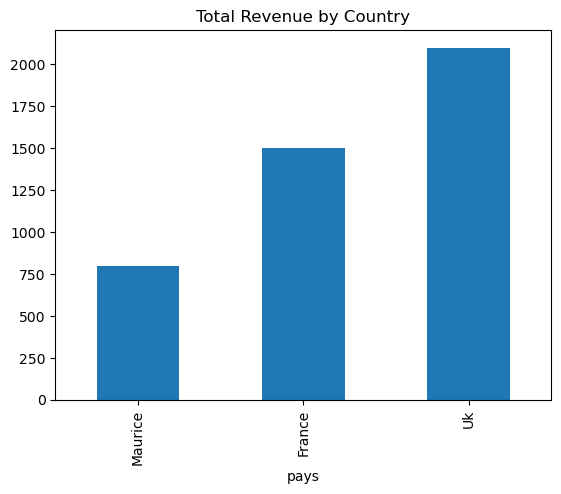

In [30]:
revenue_per_country = df_clean.groupby("pays")["montant"].sum()
revenue_per_product = df_clean.groupby("produit")["montant"].sum()
revenue_per_client = df_clean.groupby("client")["montant"].sum()

print(revenue_per_country)
print("--------------------------------")
print(revenue_per_product)
print("--------------------------------")
print(revenue_per_client)



revenue_per_country.sort_values().plot(kind="bar", title="Total Revenue by Country")
plt.show()


Text(0, 0.5, 'Revenue')

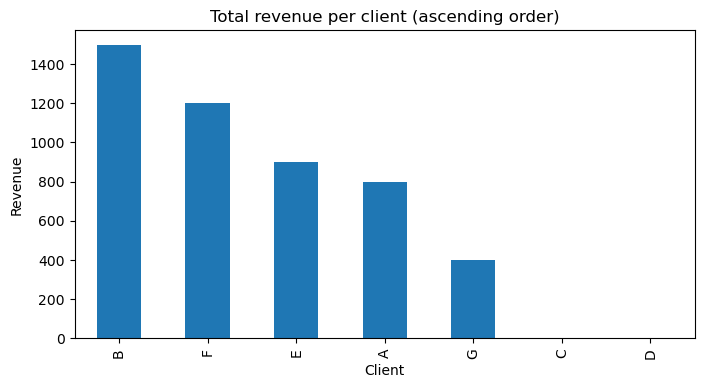

In [31]:
ax = (
    df_clean.groupby("client")["montant"]
    .sum()
    .sort_values(ascending=False)
    .plot(kind="bar", figsize=(8, 4), title="Total revenue per client (ascending order)")
)

ax.set_xlabel("Client")
ax.set_ylabel("Revenue")

## Client Segmentation (Pareto Analysis)

This analysis identifies the clients generating the majority of revenue.


In [32]:
# Revenue Per Client

revenue_per_client = (
    df_clean.groupby("client")["montant"]
    .sum()
    .sort_values(ascending=False)
)

print(ca_client)

# Cumulate Pourcentage of revenue

revenue_per_client_pct = revenue_per_client.cumsum() / revenue_per_client.sum() * 100
revenue_per_client_pct

# Table 

pareto_df = pd.DataFrame({
    "CA": ca_client,
    "CA_cumul_%": revenue_per_client_pct
})


pareto_df

client
B    1500.0
F    1200.0
E     900.0
A     800.0
G     400.0
C       0.0
D       0.0
Name: montant, dtype: float64


,CA,CA_cumul_%
client,,
B,1500.0,31.250000
F,1200.0,56.250000
E,900.0,75.000000
A,800.0,91.666667
G,400.0,100.000000
C,0.0,100.000000
D,0.0,100.000000


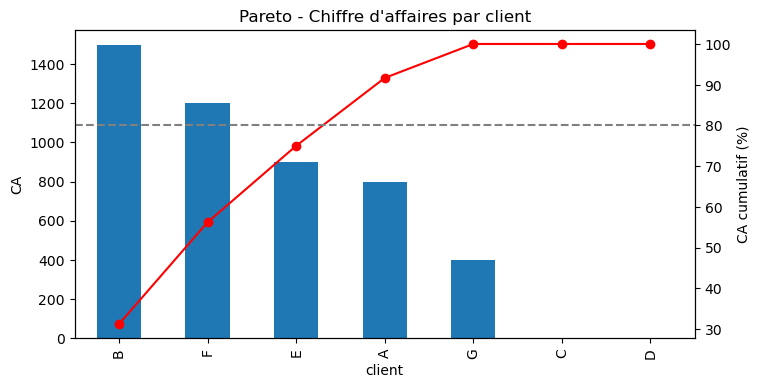

In [33]:
# Pareto visualisation

ax = pareto_df["CA"].plot(
    kind="bar",
    figsize=(8,4),
    title="Pareto - Chiffre d'affaires par client"
)

ax2 = ax.twinx()
pareto_df["CA_cumul_%"].plot(
    color="red",
    marker="o",
    ax=ax2
)

ax.set_ylabel("CA")
ax2.set_ylabel("CA cumulatif (%)")
ax2.axhline(80, color="gray", linestyle="--")

## Risk Analysis

This section evaluates revenue concentration risks.



- The analysis shows that 90% of revenue is generated by the top 4 clients, indicating a high revenue concentration risk.
The UK remains the strongest market in total revenue, while France shows the highest revenue per client.
PCs and Mobile products perform similarly, suggesting a balanced product strategy.
Revenue dependency on key clients should be monitored to reduce risk.
I recommend focusing on high-value clients while expanding the customer base in high-performing markets.

In [35]:


def segment_client(ca):
    if ca >= 1000:
        return "Top client"
    elif ca >= 300:
        return "Middle Client"
    else:
        return "Little Client"

segmentation_df = revenue_per_client.reset_index()
segmentation_df.columns = ["client", "CA"]

segmentation_df["segment"] = segmentation_df["CA"].apply(segment_client)

segmentation_df

,client,CA,segment
0,B,1500.0,Top client
1,F,1200.0,Top client
2,E,900.0,Middle Client
3,A,800.0,Middle Client
4,G,400.0,Middle Client
5,C,0.0,Little Client
6,D,0.0,Little Client


## Business Recommendations

### Recommendation 1 — Secure Revenue Streams

As revenue is highly concentrated among four key clients, it is recommended to implement a targeted retention strategy (such as customized offerings and long-term contracts) to secure and stabilize these critical revenue streams.

### Recommendation 2 — Reduce Geographic Dependency

The UK market accounts for nearly 44% of total revenue. It is therefore advisable to accelerate growth in France and Mauritius in order to reduce reliance on a single geographic market.

### Recommendation 3 — Maintain a Balanced Product Strategy

PC and Telephone products demonstrate comparable performance levels. Maintaining balanced promotion of both product lines is recommended, without disproportionately favoring one over the other.

### Recommendation 4 — Improve Data Quality

The presence of missing and unidentified data may distort analytical outcomes. Strengthening data collection and validation processes is essential prior to conducting future analyses.

## Conclusion

This analysis highlights strong revenue concentration on a limited number of clients and markets.
While product performance is balanced, customer and geographic diversification should be prioritized
to reduce business risk and ensure sustainable growth.
